In [1]:
import numpy as np

In [2]:

class MultinomialNaiveBayes:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
    
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_probs = {}
        self.feature_probs = {}
        
        num_classes = len(self.classes)
        num_features = X.shape[1]
        
        for c in self.classes:
            X_c = X[y == c]
            total_words_in_class = np.sum(X_c)
            self.class_probs[c] = len(X_c) / len(X)
            
            word_count_per_class = np.sum(X_c, axis=0)
            self.feature_probs[c] = (word_count_per_class + self.alpha) / (total_words_in_class + num_features * self.alpha)
    
    def predict(self, X):
        predictions = []
        
        for x in X:
            class_scores = {c: np.log(self.class_probs[c]) + np.sum(np.log(self.feature_probs[c]) * x)
                            for c in self.classes}
            predicted_class = max(class_scores, key=class_scores.get)
            predictions.append(predicted_class)
            
        return predictions


In [3]:
import pandas as pd
df = pd.read_excel('output_file_tweets.xlsx')

In [4]:
def text_to_num(x):
    if x == 'positive':
        return 2
    elif x == 'neutral':
        return 1
    else:
        return 0

In [5]:
df['sentiment_no'] = df['Sentiment_Label'].apply(text_to_num)

In [6]:
X = df['tweets']
Y = df['sentiment_no'].values
X

0      यह हक सरफ झठ क ह क वह जर स बल और वशषट बन रह कव...
1      Kurukshetra रहल गध कहत ह क हद टररजम खतरनक ह कग...
2      ManipurVoilence क बच कक महलओ क नरवसतर कर सडक प...
3      Kurukshetra I N D I A स कई इडय नह ह जत कगरस पर...
4      पढ दशबध क आलख वरष भमभण मरज मणपर क भरस जत यह अव...
                             ...                        
275    আলবব ৪০ চর আশরম এর চল নজর সগঠন তর করছন সগঠনর ন...
276    ফসবক পসট এবর বসফরক তণমল কগরস এর মখপতর তথ তণমল ...
277    মণপর ইসয নয এব বলক বঞচনর অভযগ BJP4India র বরদধ...
278        মণপর দডয বজপ সরকরর বরধত করর হমমত আছ অপরণ সনদর
279    দশর গনতনতর রকষর সবরথ আগম লকসভ ২০২৪ শ নরবচন একট...
Name: tweets, Length: 280, dtype: object

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state = 101)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x_traincv = cv.fit_transform(x_train)
x_testcv = cv.transform(x_test)

In [9]:
x_testcv_array = x_testcv.toarray()
x_traincv_array = x_traincv.toarray()

In [10]:
model = MultinomialNaiveBayes(alpha=1.0)

In [11]:
model.fit(x_traincv_array, y_train)

In [12]:
predictions = model.predict(x_testcv_array)

In [13]:
predictions

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1]

In [14]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)

In [15]:
accuracy

0.875

In [16]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB(alpha = 1.0)

In [17]:
model.fit(x_traincv_array, y_train)

MultinomialNB()

In [18]:
predicts = model.predict(x_testcv_array)

In [19]:
predicts

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [20]:
accurate = accuracy_score(y_test, predicts)

In [21]:
accurate

0.875

In [22]:
class_label = ['Negative', 'Neutral', 'Positive']

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[ 0,  3,  0],
       [ 1, 49,  0],
       [ 0,  3,  0]])

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Confusion matrix')

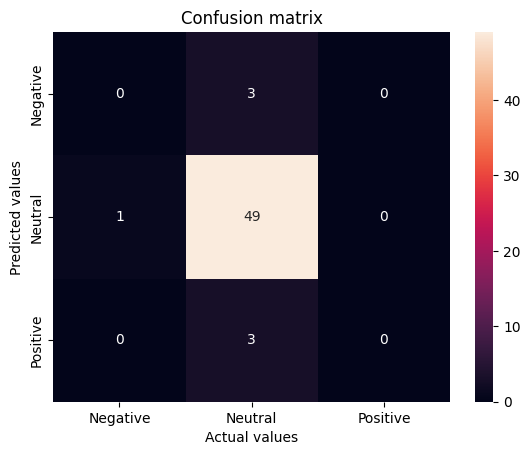

In [25]:
sns.heatmap(cm, annot = True, xticklabels = class_label, yticklabels = class_label)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix')

In [27]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [28]:
precision = precision_score(y_test, predictions, average='weighted')

/Users/rishavghosh/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
precision

0.7954545454545455

In [30]:
recall = recall_score(y_test, predictions, average='weighted')

In [31]:
recall

0.875

In [32]:
f1 = f1_score(y_test, predictions, average='weighted')

In [33]:
f1

0.8333333333333333